In [1]:
import sys
import copy
sys.path.insert(0, "..")
from classes.calculators.lennardjones import LennardJones
from classes.atoms import Atom_Collection, Atom
from classes.optimizers.metropol import Metropol
from classes.optimizers.particle_swarm import Particle, Particle_swarm
import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np
plt.rc('animation', html='jshtml')

In [2]:
def random_inits(N, x_min=-4.0, x_max=4.0, y_min=-4.0, y_max=4.0):
    ns = np.random.rand(N,2)
    ns[:,0]*=(x_max-x_min)
    ns[:,0]+=x_min
    ns[:,1]*=(y_max-y_min)
    ns[:,1]+=y_min
    return ns

def create_test_atom_col(grid_size, fixed_col="C1", non_fixed_col="C0"):
    atom_list = []
    colors = [non_fixed_col] + [fixed_col for i in range(3)]
    init_pos_rand = random_inits(N=1, x_min=grid_size[0], x_max=grid_size[1], y_min=grid_size[0], y_max=grid_size[1])
    #print(init_pos_rand[0])
    positions = np.array([init_pos_rand[0],[-1.0,0.0],[1.0,0.0],[0.0, 1.5]])
    #new_arr = np.insert(init_pos_rand,0, positions)#.reshape(3, 2)
    #print(positions)
    for pos, col in zip(positions, colors):
        atom = Atom(pos, color=col)
        atom_list.append(atom)
    atom_col = Atom_Collection(atomlist=atom_list)
    atom_col.freeze_atoms(indices=[1,2,3])
    atom_col.calculator = LennardJones()
    return atom_col

def create_atom_col(N_atoms, grid_size, fixed_col="C1", non_fixed_col="C0"):
    atom_list = []
    colors = [fixed_col] + [non_fixed_col for i in range(N_atoms-1)]
    init_pos = random_inits(N=N_atoms-1, x_min=grid_size[0], x_max=grid_size[1], y_min=grid_size[0], y_max=grid_size[1])
    init_pos_fixed = np.array([0.0,0.0])
    new_arr = np.insert(init_pos,0, init_pos_fixed).reshape(N_atoms, 2)
    for pos, col in zip(new_arr, colors):
        atom = Atom(pos, color=col)
        atom_list.append(atom)
    atom_col = Atom_Collection(atomlist=atom_list)
    atom_col.freeze_atoms(indices=[0])
    return atom_col

In [3]:
atom_cols = [create_test_atom_col([-3.0,3.0]) for i in range(5)]
particles = [Particle(atom_col=atom_col) for atom_col in atom_cols]
particle_swarm = Particle_swarm(particles=particles, c1=1.5, c2=2.0, w=0.8)

In [4]:
best_particle = particle_swarm.run(N_max=400, E_crit=-14.0)

In [5]:
particle_swarm.global_best_energy

-13.601824420228827

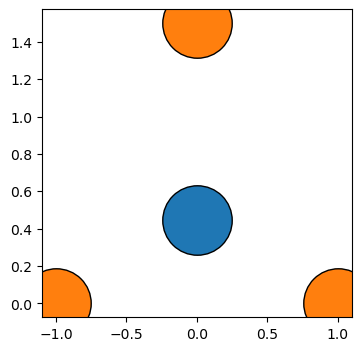

In [6]:
fig, ax = plt.subplots(figsize=(4,4))
best_particle.atom_col.plot(ax=ax)

In [99]:
atom_cols = []
N_atoms = 17
sizes = [20.0 for i in range(N_atoms)]
for i in range(400):
    ax.grid()
    ax.set_xlim([-4,4])
    ax.set_ylim([-4,4])
    atom_col = create_atom_col(N_atoms=N_atoms, grid_size=[-3.0,3.0])
    atom_col.set_sizes(new_sizes=sizes)
    atom_col.calculator = LennardJones()
    atom_cols.append(atom_col)

In [100]:
particles = [Particle(atom_col=atom_col) for atom_col in atom_cols]
particle_swarm = Particle_swarm(particles=particles, c1=1.5, c2=2.0, w=0.8)
opt_part = particle_swarm.run(N_max=8000, E_crit=-400.0)

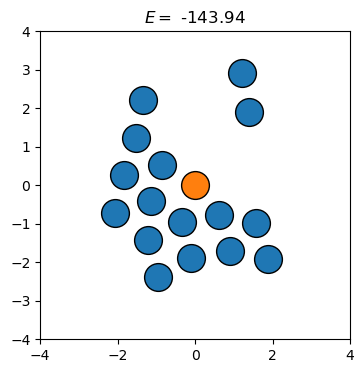

In [101]:
fig, ax = plt.subplots(figsize=(4,4))
ax.set_xlim([-4.0,4.0])
ax.set_ylim([-4.0,4.0])
ax.set_title(rf"$E = $ {opt_part.get_energy().round(3)}")
opt_part.atom_col.plot(ax=ax)